In [94]:
df = pd.read_csv('constant_c.csv')

df.iloc[:10201].to_csv('constant_c.csv', index=False) 

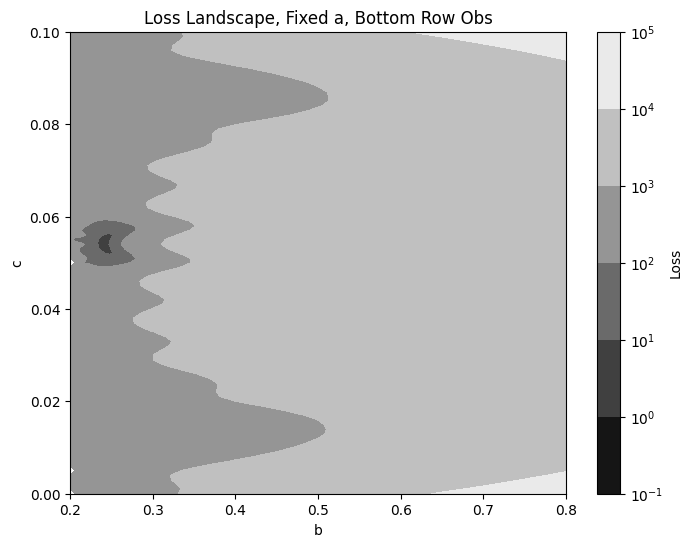

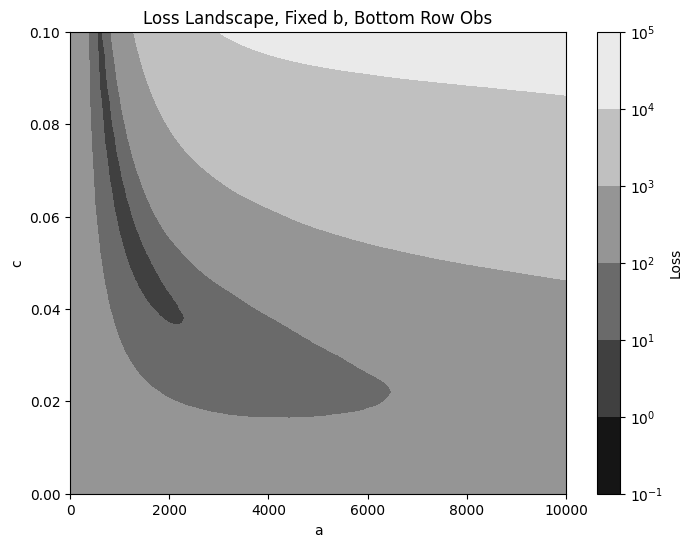

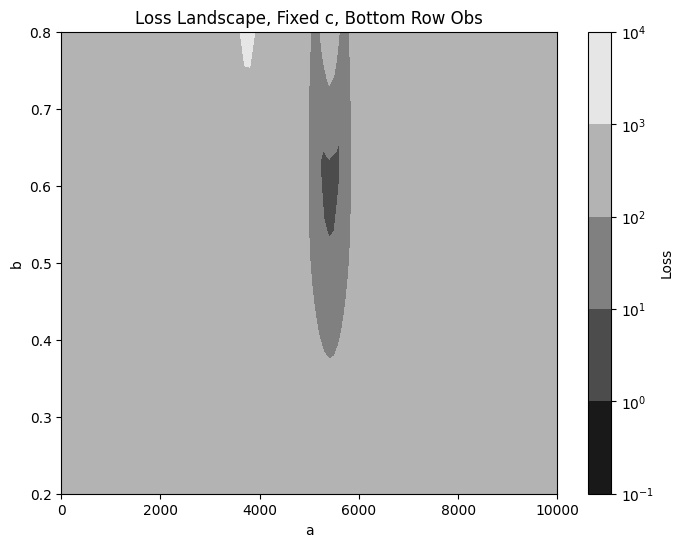

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

param_names = ['a', 'b', 'c']
static_params = ['a','b', 'c']

for name in static_params:
    sub_params = param_names.copy()
    sub_params.remove(name)

    filename = 'constant_' + name + '_row.csv'
    results_df = pd.read_csv(filename)

    param1 = results_df[sub_params[0]]
    param2 = results_df[sub_params[1]]
    loss = results_df['loss'] / results_df['loss'].min()

    # Create a grid for contour plotting
    param1_unique = np.unique(param1)
    param2_unique = np.unique(param2)

    # Reshape the loss values into a 2D grid
    loss_grid = loss.values.reshape(len(param1_unique), len(param2_unique))

    # Create the contour plot
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(param1_unique, param2_unique, loss_grid, levels=50, cmap='grey', norm=mpl.colors.LogNorm())
    plt.colorbar(contour, label='Loss')
    plt.xlabel(sub_params[0])
    plt.ylabel(sub_params[1])
    plt.title('Loss Landscape, Fixed ' + name + ", Bottom Row Obs")
    plt.show()

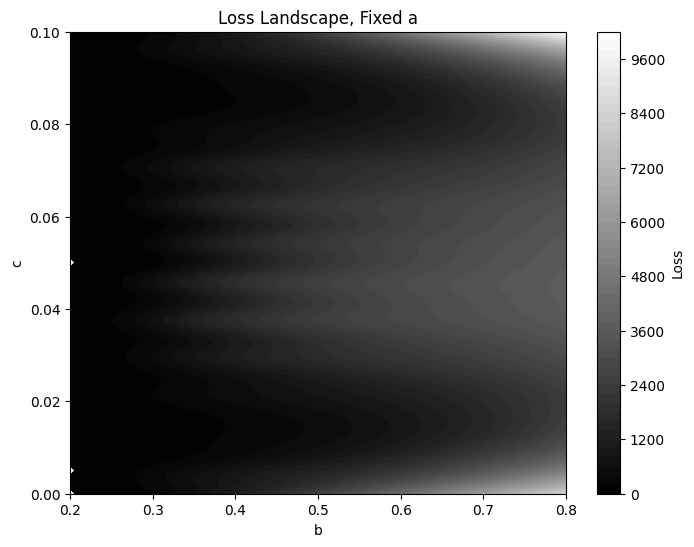

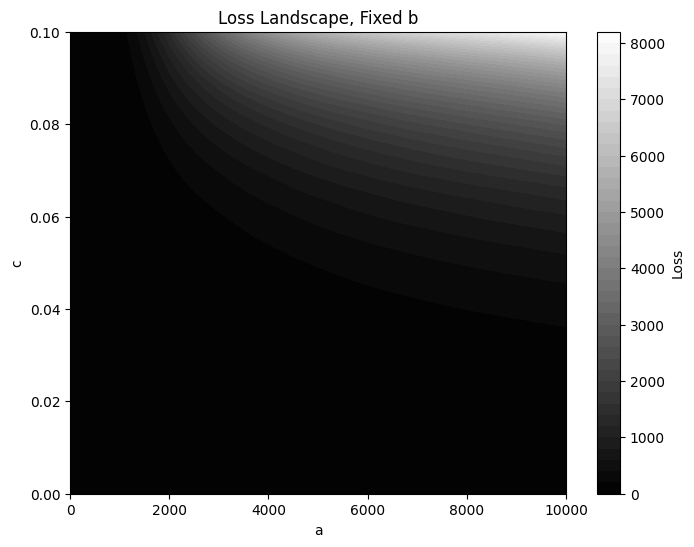

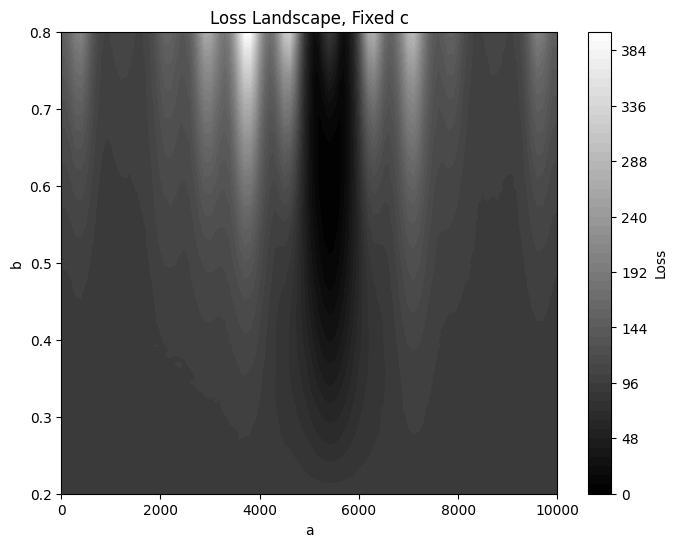

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

param_names = ['a', 'b', 'c']
static_params = ['a', 'b', 'c']

for name in static_params:
    sub_params = param_names.copy()
    sub_params.remove(name)

    filename = 'constant_' + name + '.csv'
    results_df = pd.read_csv(filename)

    param1 = results_df[sub_params[0]]
    param2 = results_df[sub_params[1]]
    loss = results_df['loss'] / results_df['loss'].min()

    # Create a grid for contour plotting
    param1_unique = np.unique(param1)
    param2_unique = np.unique(param2)

    # Reshape the loss values into a 2D grid
    loss_grid = loss.values.reshape(len(param1_unique), len(param2_unique))

    # Create the contour plot
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(param1_unique, param2_unique, loss_grid, levels=50, cmap='grey')#, norm=mpl.colors.LogNorm())
    plt.colorbar(contour, label='Loss')
    plt.xlabel(sub_params[0])
    plt.ylabel(sub_params[1])
    plt.title('Loss Landscape, Fixed ' + name)
    plt.show()

    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # scatter = ax.contour(
    #     results_df[sub_params[0]], 
    #     results_df[sub_params[1]], 
    #    (results_df['loss'], results_df['loss']), 
    #     cmap='grey', 
    #     norm=mpl.colors.LogNorm()
    #     )
    # ax.set_xlabel(sub_params[0])
    # ax.set_ylabel(sub_params[1])
    # # ax.set_yscale('log')
    # fig.colorbar(scatter, label='Loss')
    # plt.show()

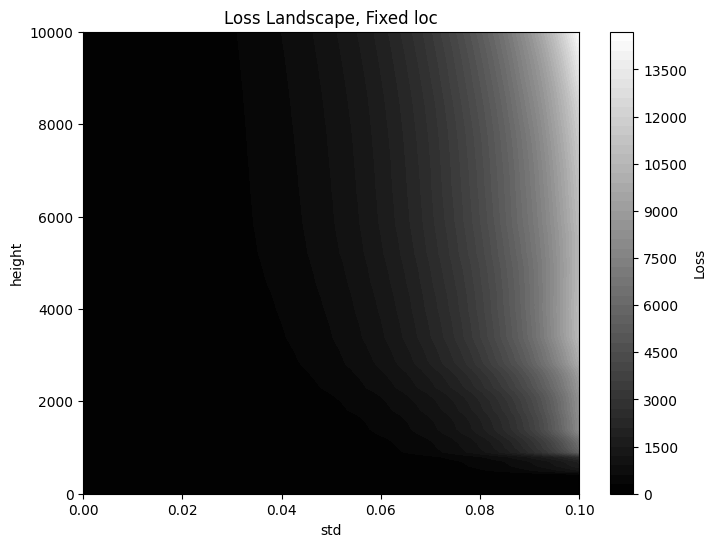

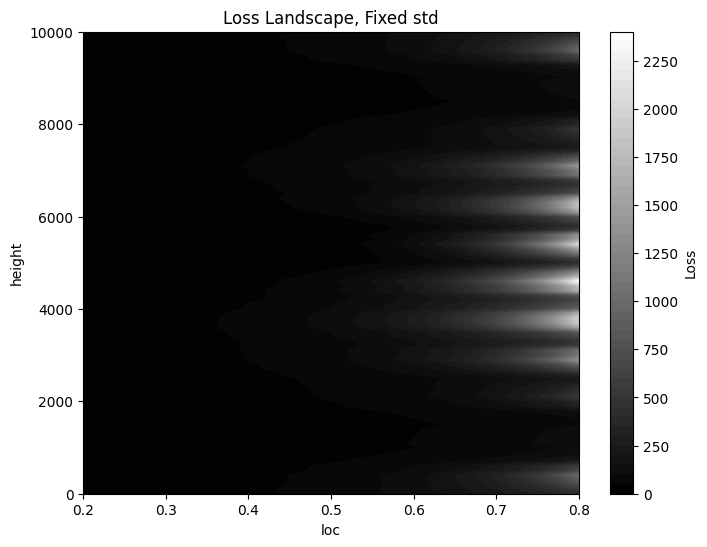

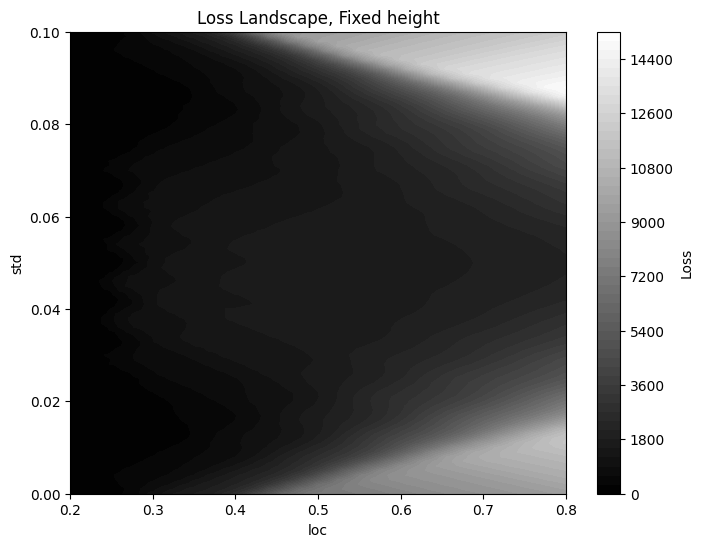

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

param_names = ['loc', 'std', 'height']
static_params = ['loc', 'std', 'height']

for name in static_params:
    sub_params = param_names.copy()
    sub_params.remove(name)

    filename = 'constant_' + name + '.csv'
    results_df = pd.read_csv(filename)

    param1 = results_df[sub_params[0]]
    param2 = results_df[sub_params[1]]
    loss = results_df['loss'] / results_df['loss'].min()

    # Create a grid for contour plotting
    param1_unique = np.unique(param1)
    param2_unique = np.unique(param2)

    # Reshape the loss values into a 2D grid
    loss_grid = loss.values.reshape(len(param1_unique), len(param2_unique))

    # Create the contour plot
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(param1_unique, param2_unique, loss_grid, levels=50, cmap='grey')#, norm=mpl.colors.LogNorm())
    plt.colorbar(contour, label='Loss')
    plt.xlabel(sub_params[0])
    plt.ylabel(sub_params[1])
    plt.title('Loss Landscape, Fixed ' + name)
    plt.show()

    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # scatter = ax.contour(
    #     results_df[sub_params[0]], 
    #     results_df[sub_params[1]], 
    #    (results_df['loss'], results_df['loss']), 
    #     cmap='grey', 
    #     norm=mpl.colors.LogNorm()
    #     )
    # ax.set_xlabel(sub_params[0])
    # ax.set_ylabel(sub_params[1])
    # # ax.set_yscale('log')
    # fig.colorbar(scatter, label='Loss')
    # plt.show()

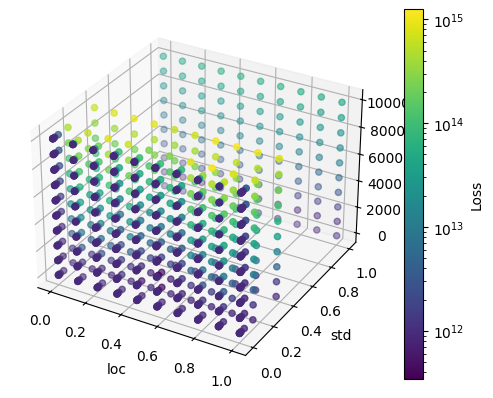

In [26]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the results
results_df = pd.read_csv("loss_results.csv")

# Extract data for plotting
param1 = results_df['loc']
param2 = results_df['std']
param3 = results_df['height']
loss = results_df['loss']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(param1, param2, param3, c=loss, cmap='viridis', norm=mpl.colors.LogNorm())
ax.set_xlabel('loc')
ax.set_ylabel('std')
ax.set_zlabel('height')
# ax.set_yscale('log')
fig.colorbar(scatter, label='Loss')
plt.show()

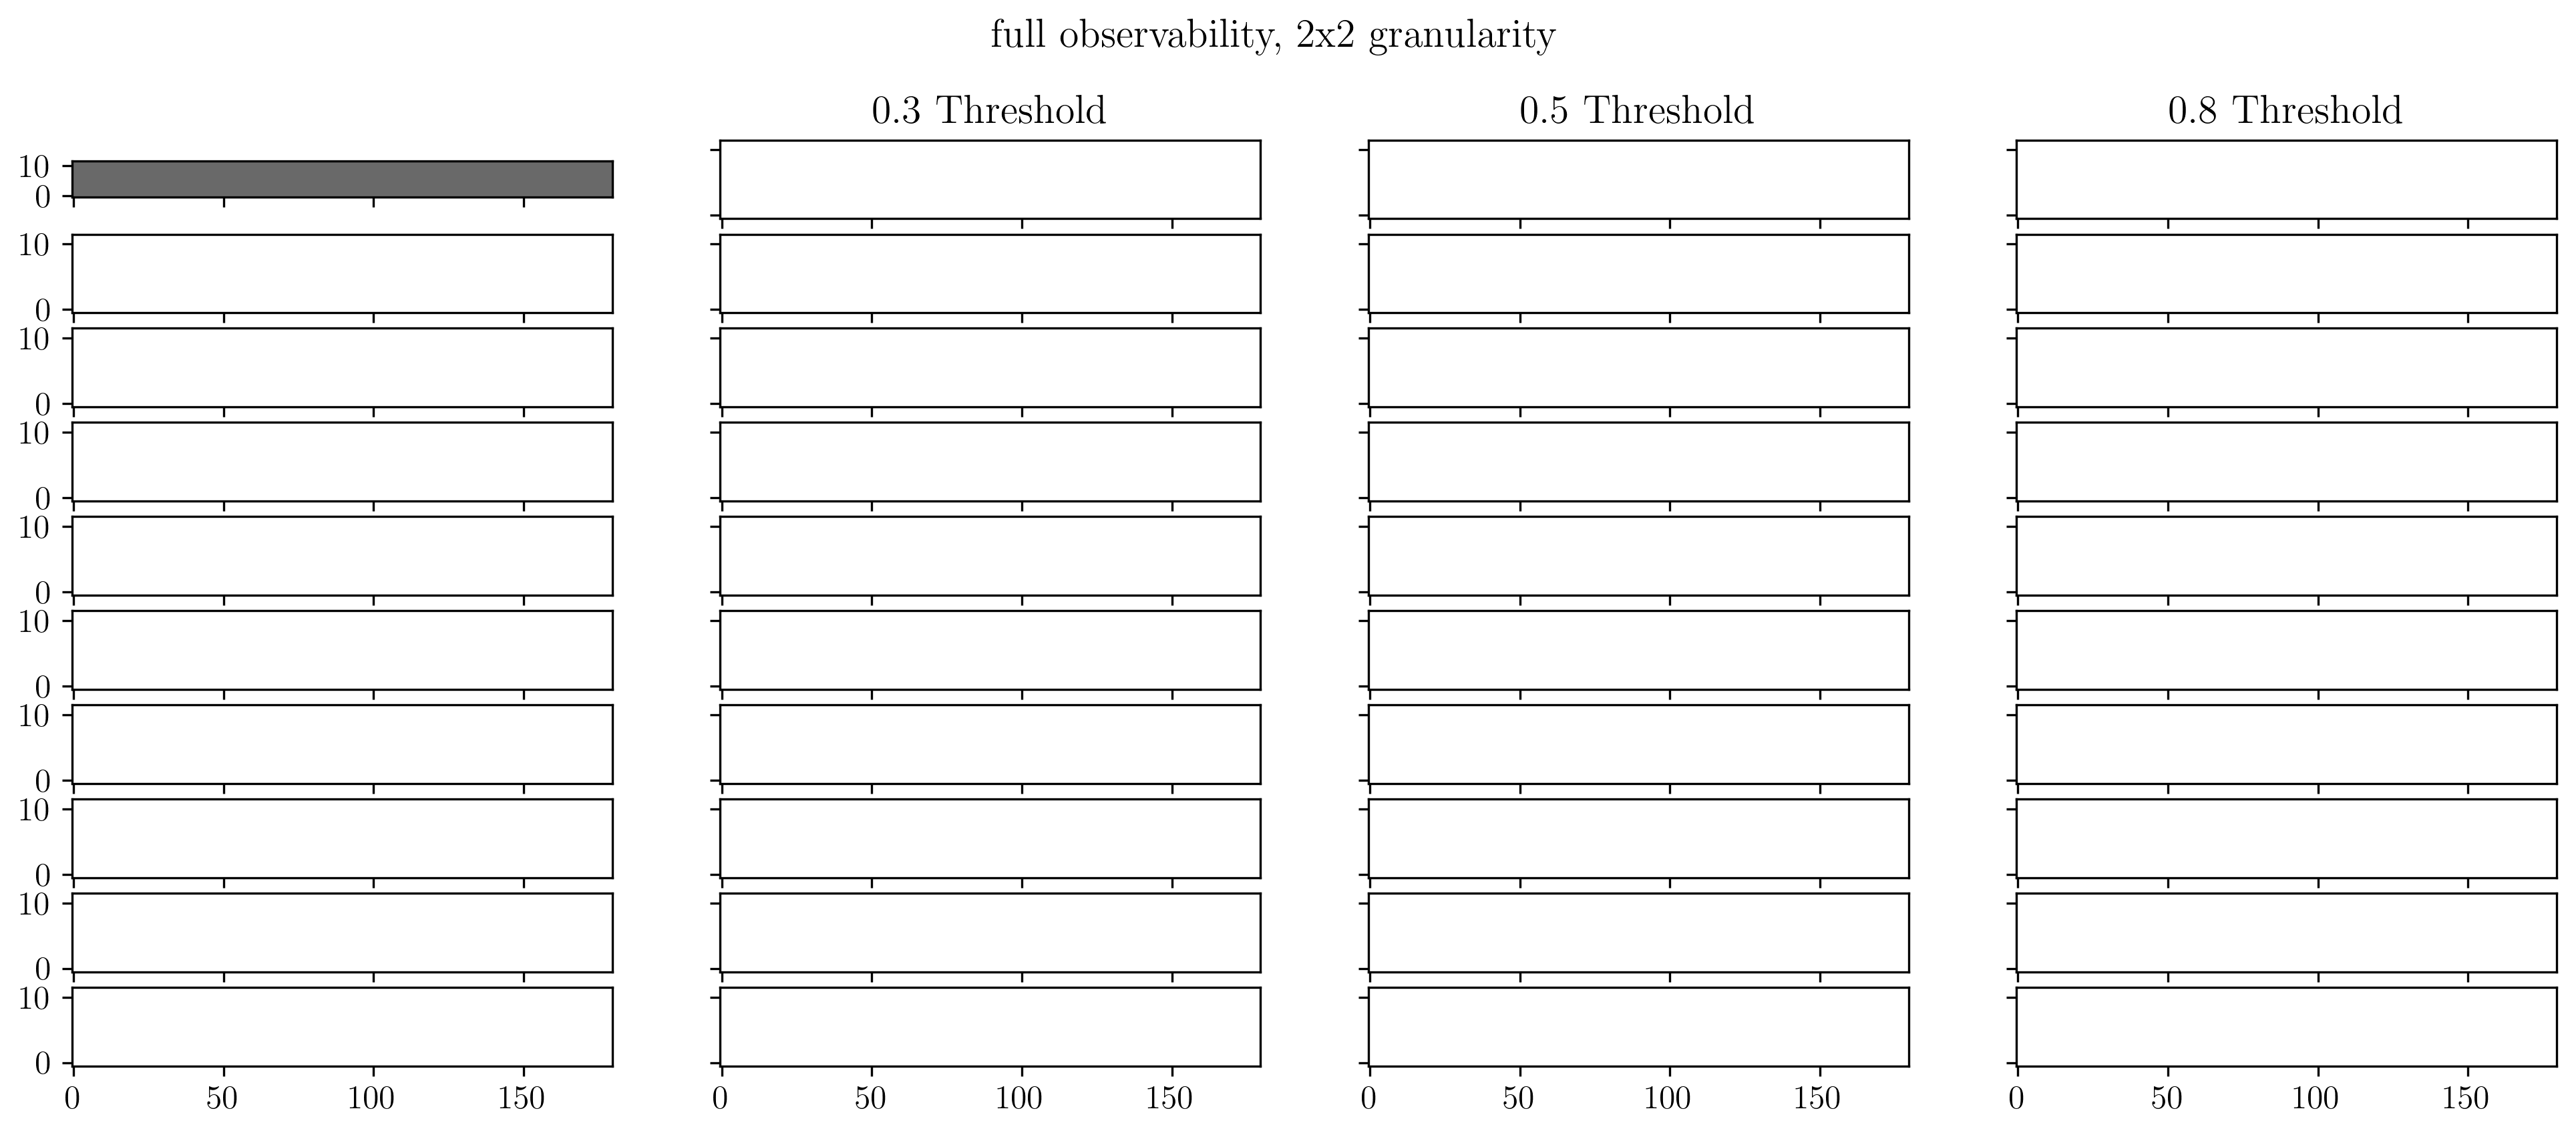

In [5]:
import matplotlib.pyplot as plt
import matplotlib, os
import json, einops
import numpy as np
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)



obs_choices = ["full", "sensor"]
cases = ['d', 'g', 'h', 'v', 'dm', 'gm', 'vm', 'gt', 'gtm', 'ht']
deviation_threshold_list = [0.3, 0.5, 0.8]

obs = 'full'
threshold = 0.5

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]



Nx = 180
Ny = 12
n_particles = Nx * Ny


pattern = r"_(\d+)_(\d+)_"


    
fig, axs = plt.subplots(10,4, sharex=True, sharey=True, figsize=(16,6))


fig.suptitle(f'{obs} observability, 2x2 granularity')

# for i in range(10):
#     axs[i, 0].set_ylabel(str(i))

filename = [
    f"result_l_{0.5}_s_{10}_h_{3000}_full.json"
]
with open(filename[0]) as json_file:
    result = json.load(json_file)['E_final'] 
E = np.zeros(n_particles)
for i in range(Nx):
    for j in range(Ny):
        E[j*Nx+i] = result[i + j * Nx]
E = einops.rearrange(E, "(y x) -> x y", y=Ny).transpose()

axs[0, 0].imshow(E, origin='lower', cmap='Greys', vmin=100, vmax = 6000)
axs[0, 1].set_title('0.3 Threshold')
axs[0, 2].set_title('0.5 Threshold')
axs[0, 3].set_title('0.8 Threshold')

# axs[0, 4].set_title('Individual Particles')
plt.show()

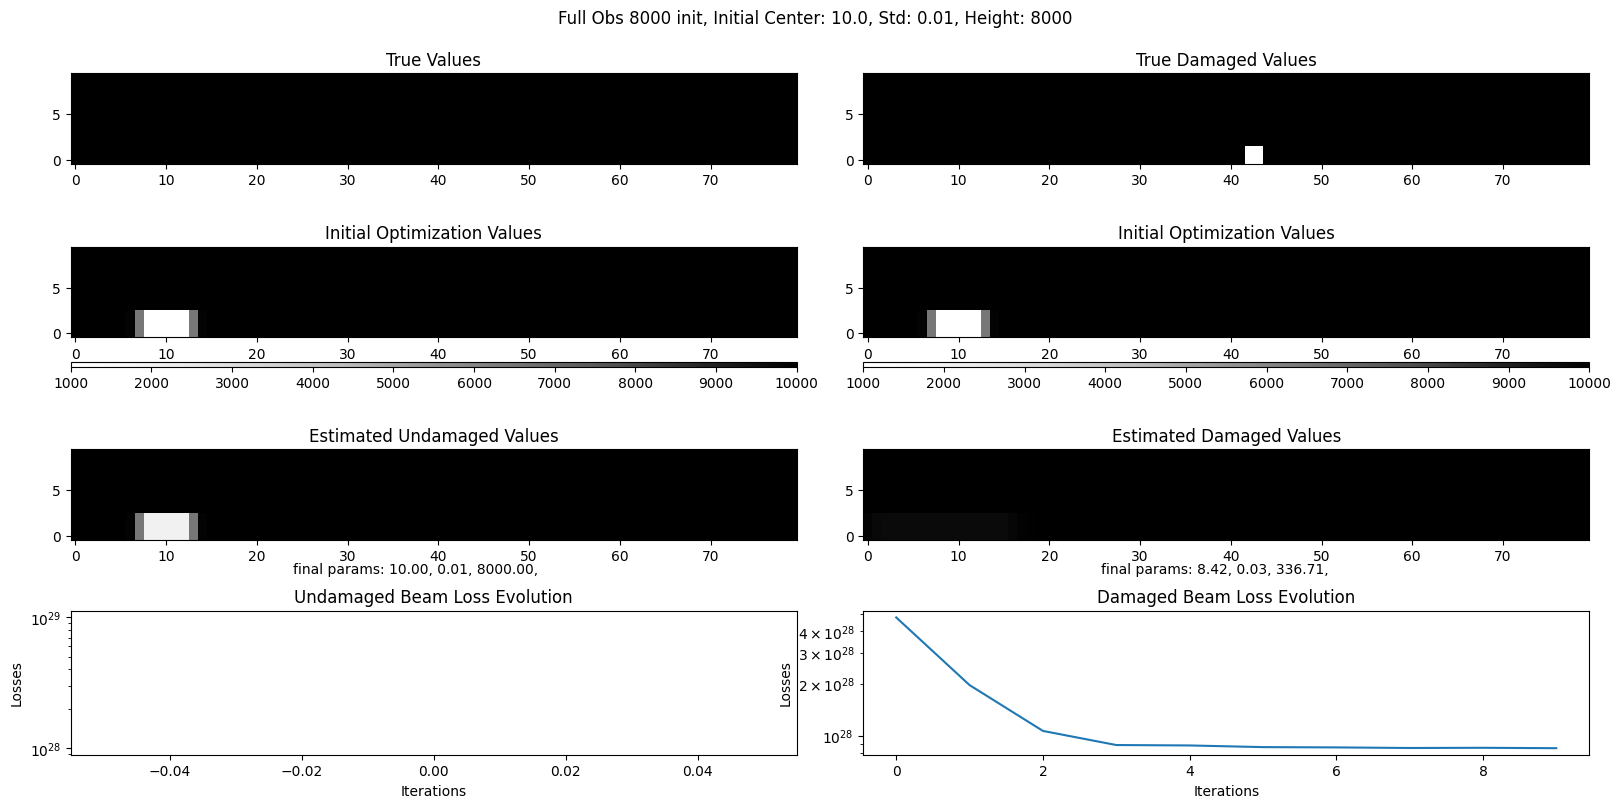

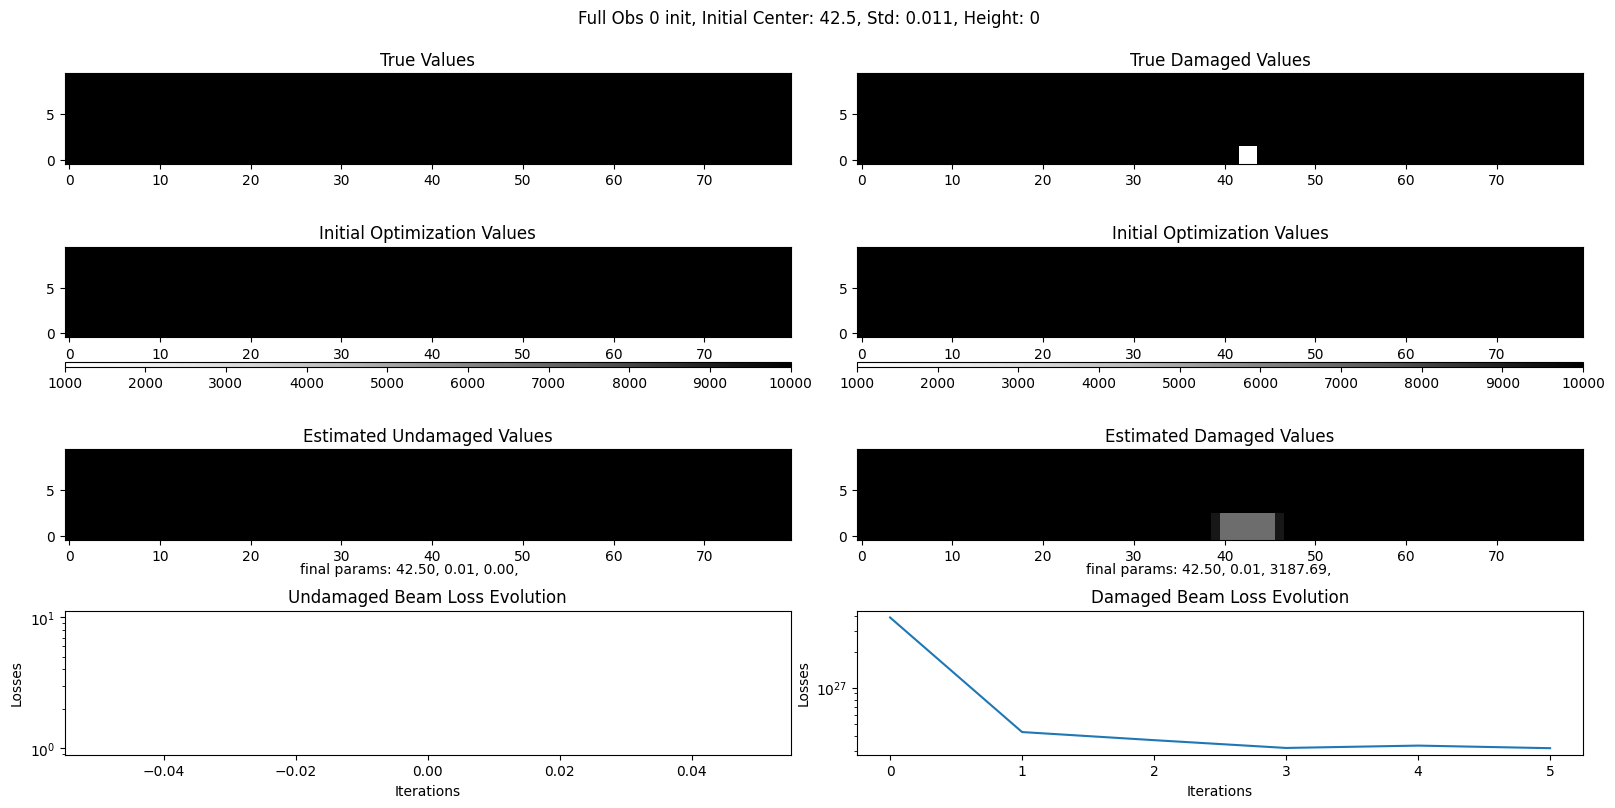

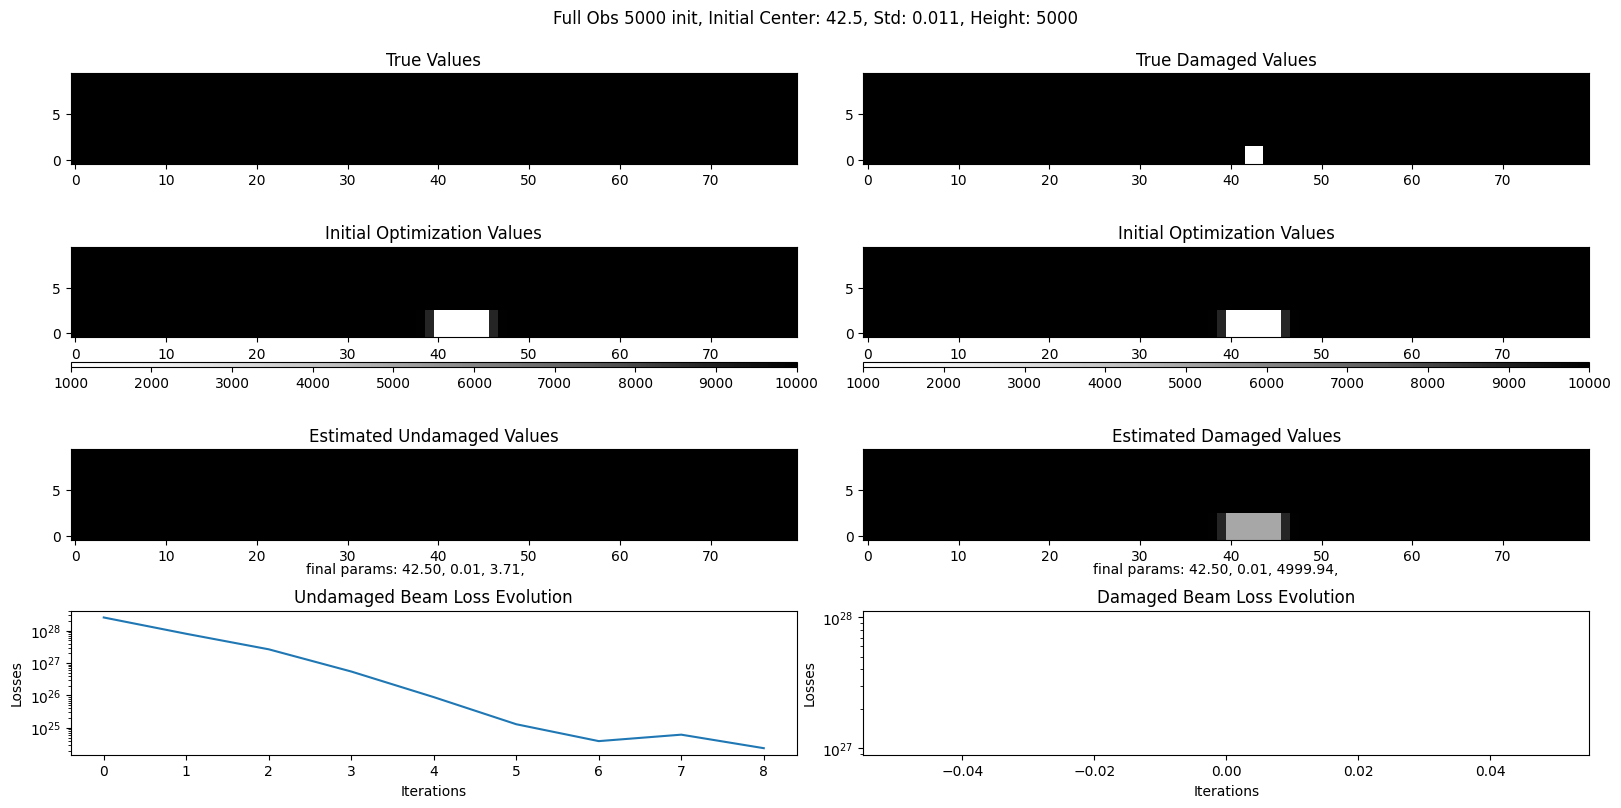

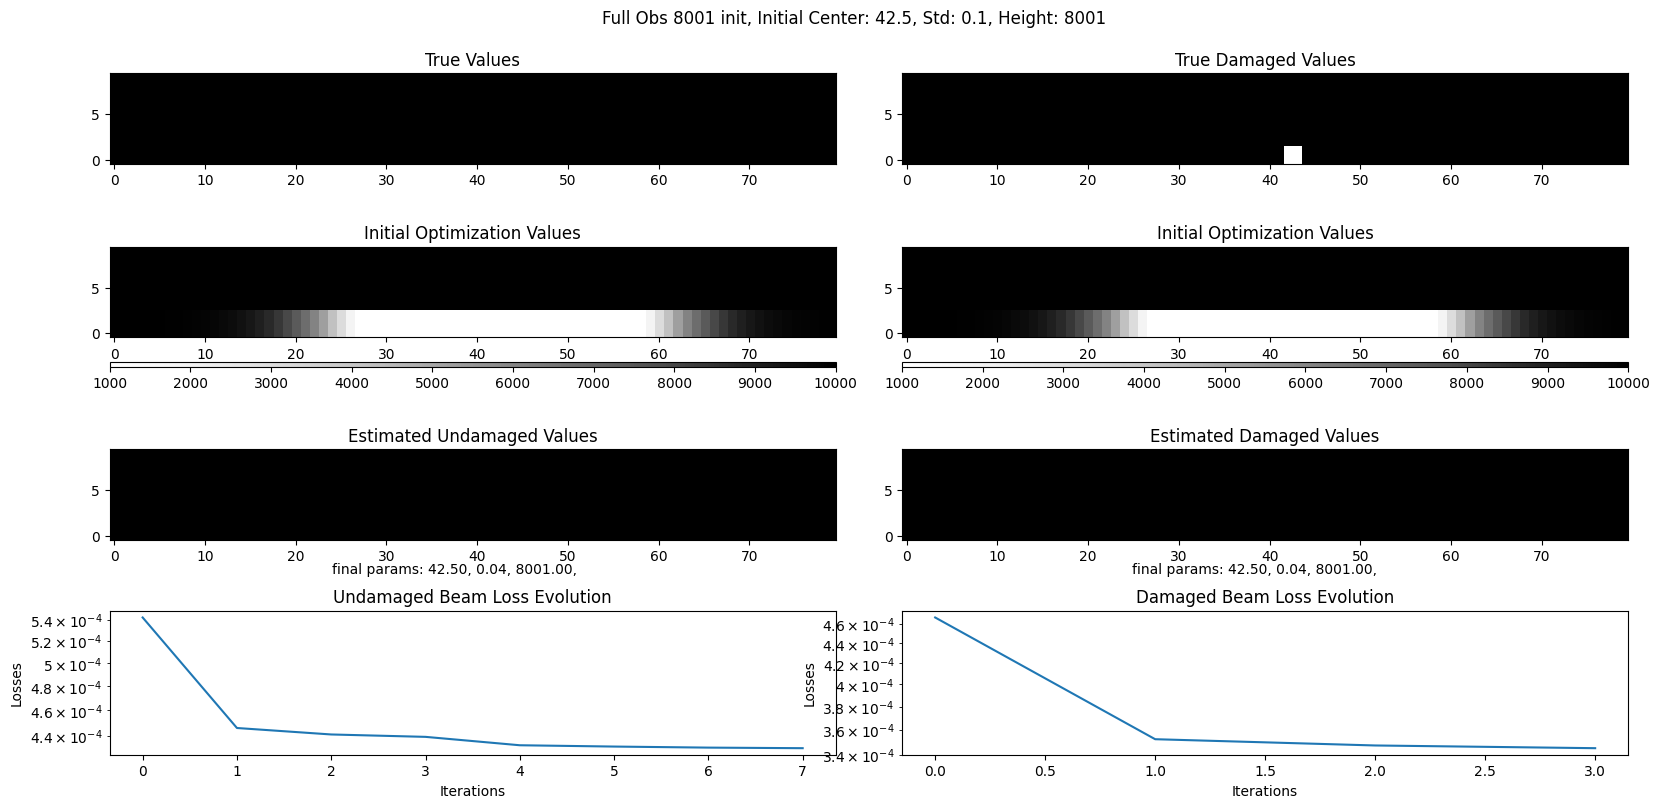

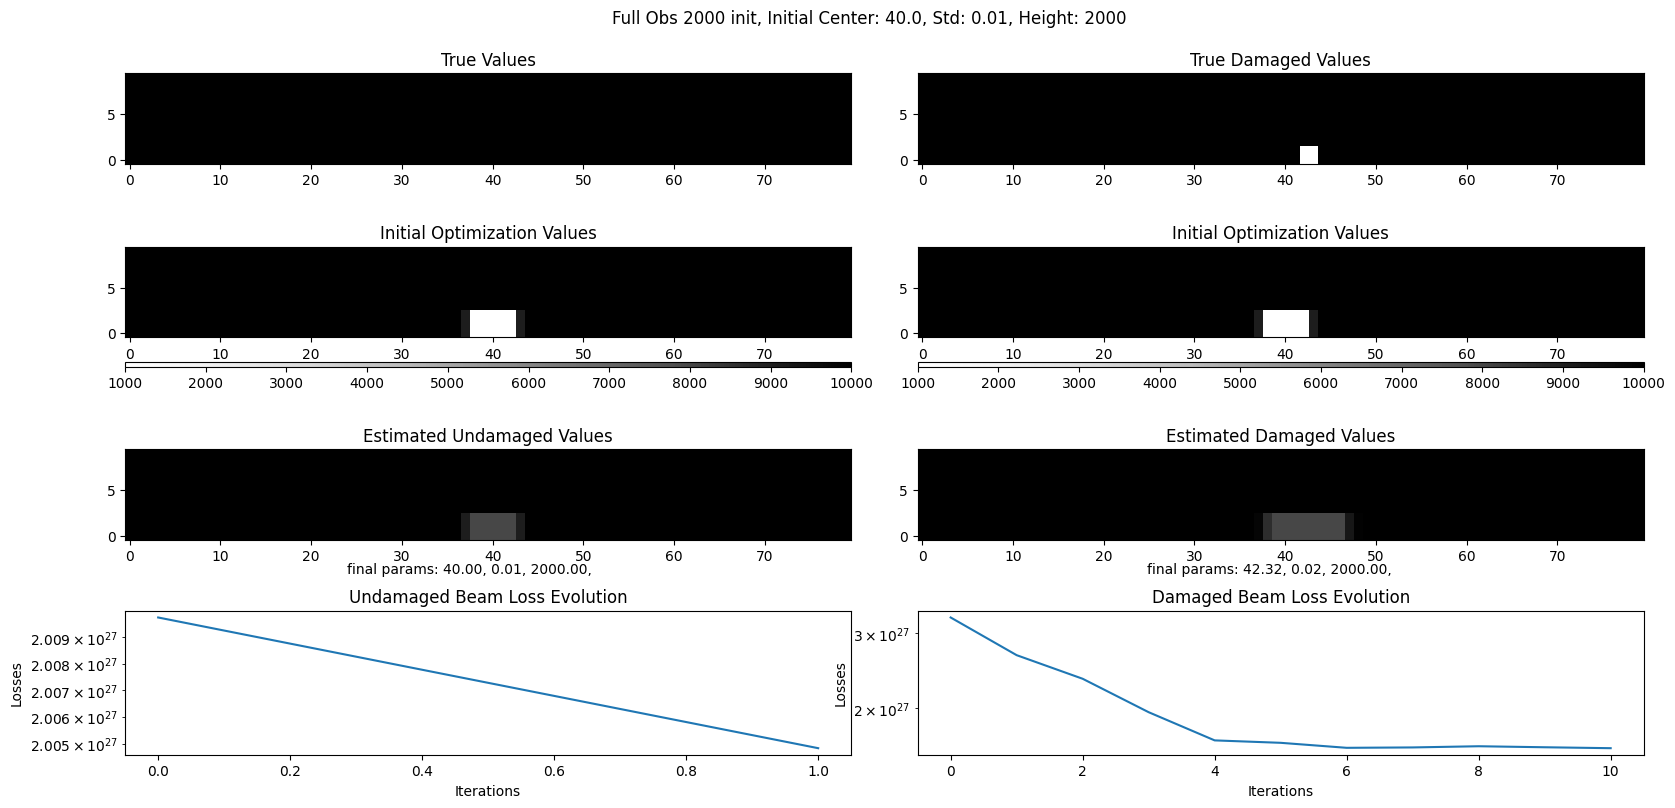

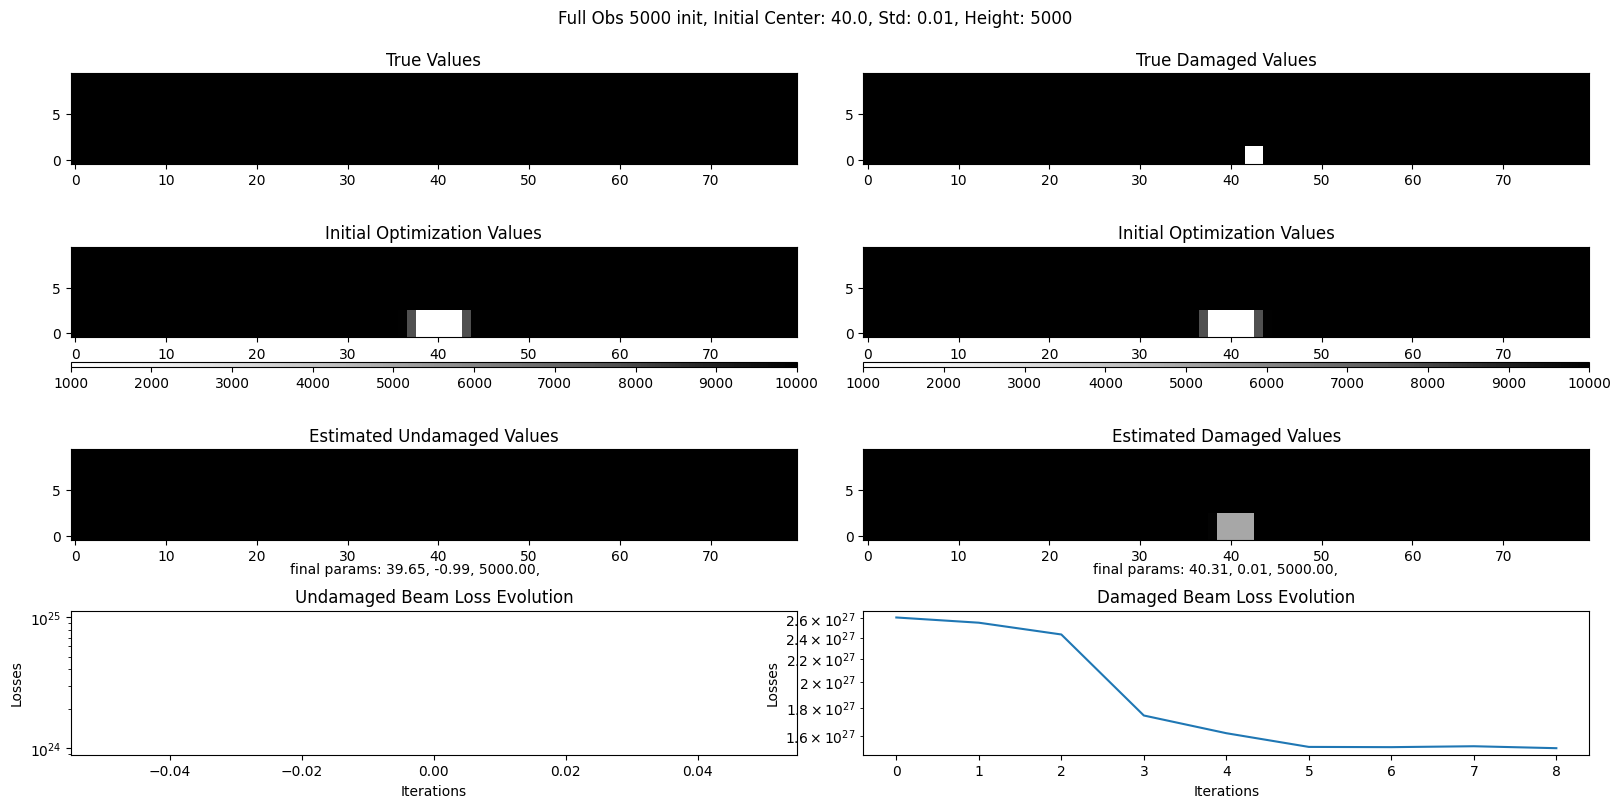

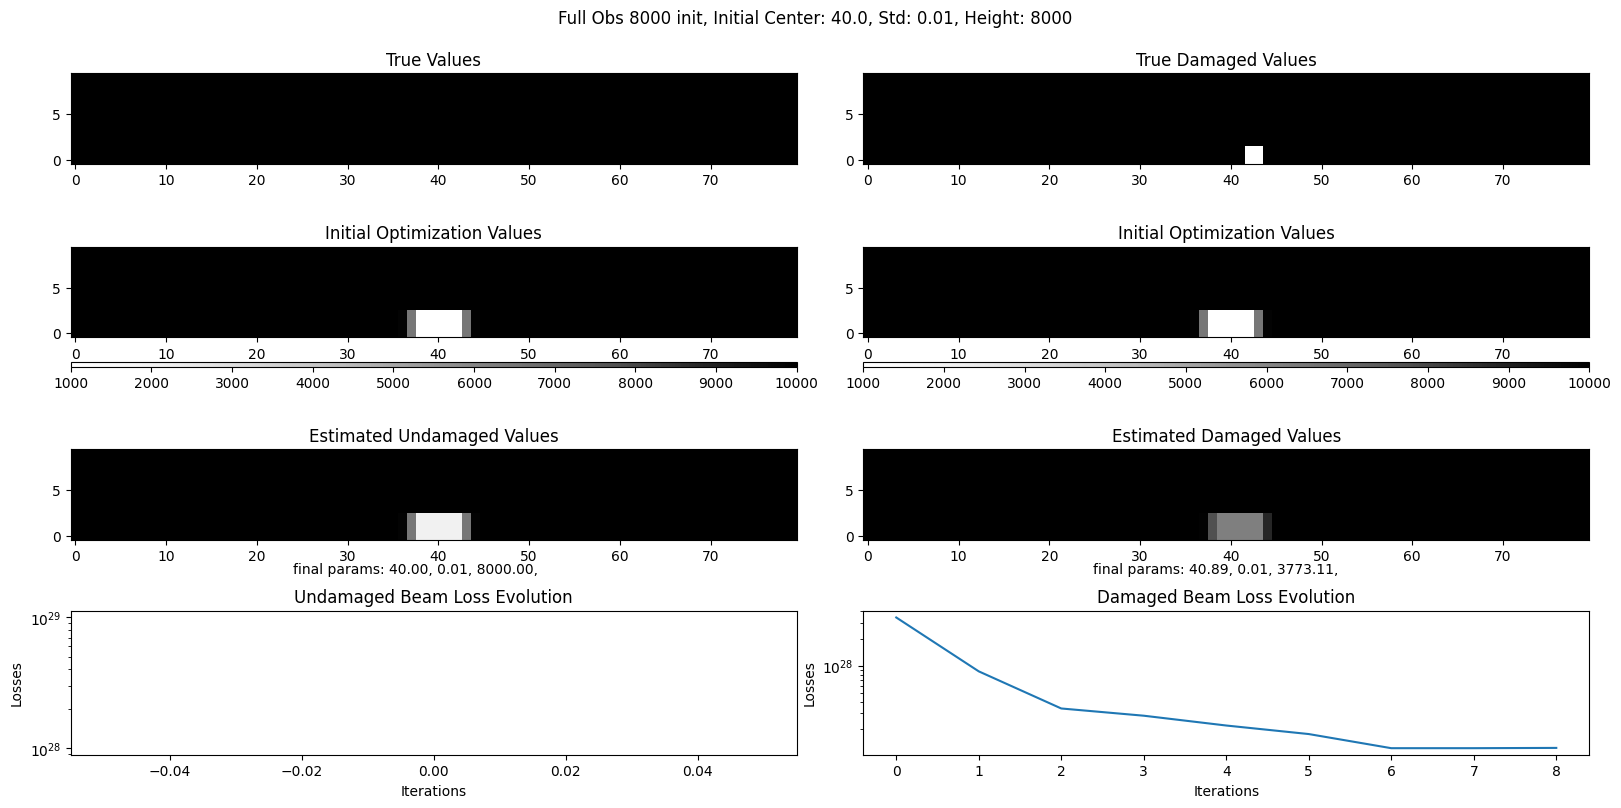

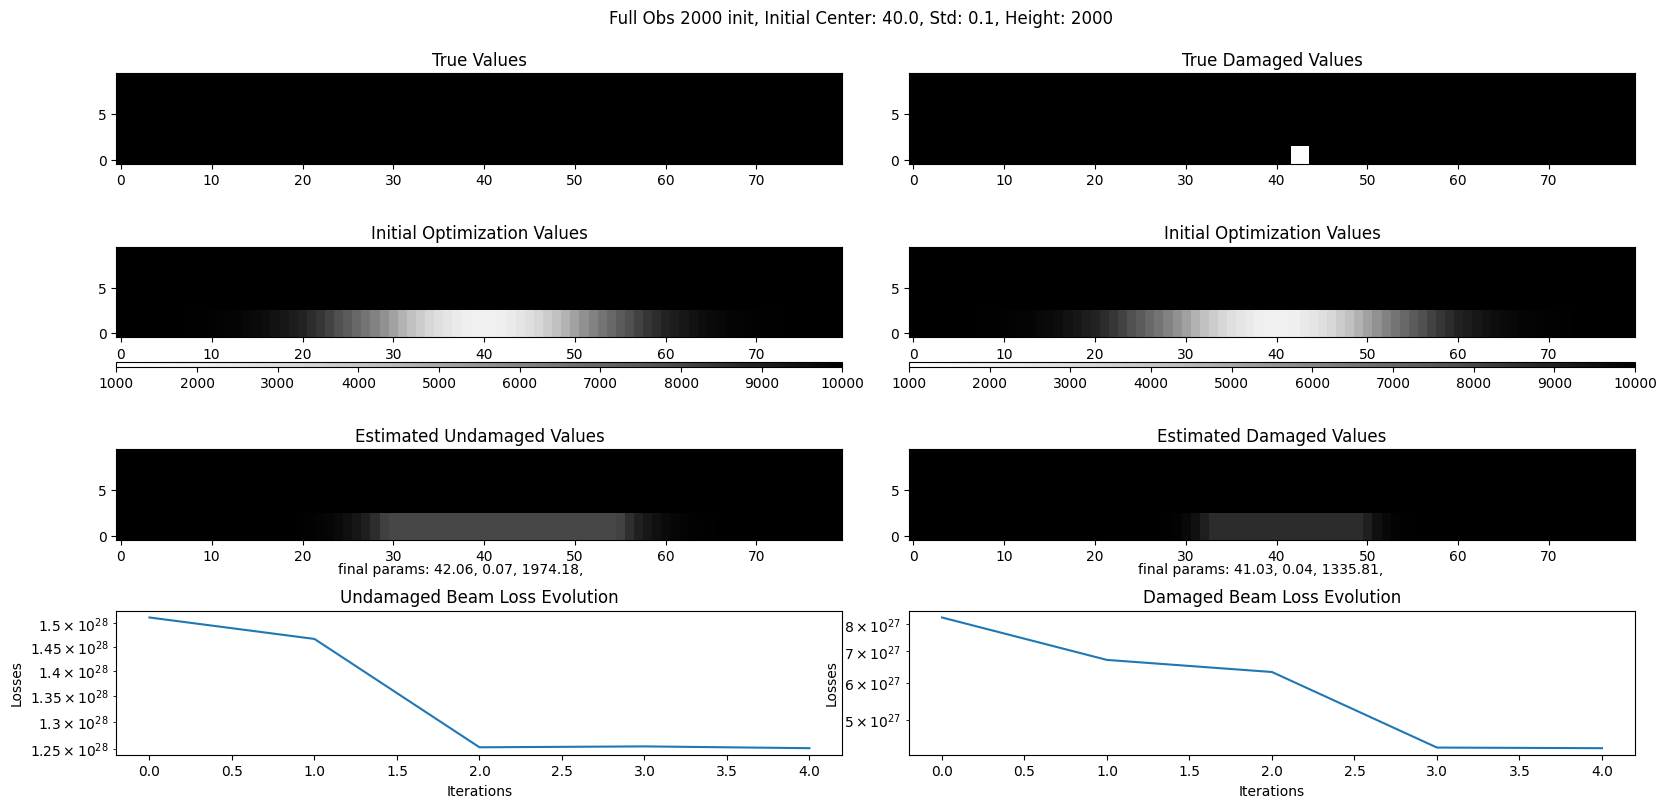

In [64]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
import taichi as ti
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]


E_hists = []
results = []
avg_err = []
avg_err_damaged = []


Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)
E_damaged = np.zeros(n_particles)
E_init = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 10000
    E_damaged[i] = 10000

E_damaged[42] = 1000
E_damaged[43] = 1000
E_damaged[122] = 1000
E_damaged[123] = 1000



grouped_list = [filenames[i:i+2] for i in range(0, len(filenames), 2)]
grouped_list


for group in grouped_list:
    name = group[0]
    name_damaged = group[1]
    with open(name) as json_file:
        jfile = json.load(json_file)
        result = np.array(jfile['E_final'])
        params = np.array(jfile['params'])
        losses = np.array(jfile['losses'])
    with open(name_damaged) as json_file:
        jfile = json.load(json_file)
        result_damaged = np.array(jfile['E_final'])
        params_damaged = np.array(jfile['params'])
        losses_damaged = np.array(jfile['losses'])




    if re.findall("row", name):
        obs = 'Bottom Row Obs '
    elif re.findall("sensor", name):
        obs = 'Element-Spaced Obs '
    else:
        obs = 'Full Obs '

    if re.findall("weighedloss", name):
        weighed_loss=True
    else:
        weighed_loss=False

    start = int(re.findall("h_(\d*)", name)[0])

    loc = float(re.findall("l_(\d*\.\d*)", name)[0])
    std = float(re.findall("s_(\d*\.\d*)", name)[0])


    for i in range(n_particles):
        row = i // Nx
        col = i % Nx
        if row > 2:
            E_init[i] = 10000
        else:
            E_init[i] = 10000 - start \
                /(ti.math.sqrt(2.0 * 3.1415) * std) \
                * ti.math.exp(-ti.math.pow(((col)/(Nx) * 0.8 + 0.1 - loc) / std, 2.0) / 2)


    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_damaged_reshape = einops.rearrange(E_damaged, "(y x) -> x y", y=Ny)
    E_init_reshape = einops.rearrange(E_init, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(result, "(y x) -> x y", y=Ny)
    E2_reshape = einops.rearrange(result_damaged, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    error_damaged = np.abs(np.divide((E2_reshape - E_damaged_reshape), E_damaged_reshape))
    avg_err.append(np.mean(error.flatten()))
    avg_err_damaged.append(np.mean(error_damaged.flatten()))

    fig, axs = plt.subplots(4,2, figsize=(16,8))
    title = obs + str(start) + " init"

    if weighed_loss:
        title = title + ", weighed loss"

    title = title \
        + ", Initial Center: " + str((loc - 0.1) / 0.8 * Nx) \
        + ", Std: " + str(std) \
        + ", Height: " + str(start)

    fig.suptitle(title)
    fig.tight_layout()
    vmax = 10000
    vmin = 1000

    axs[0, 0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=vmin, vmax=vmax)
    axs[0, 0].set_title('True Values')

    axs[0, 1].imshow(E_damaged_reshape.transpose(), origin='lower', cmap='Greys', vmin=vmin, vmax=vmax)
    axs[0, 1].set_title('True Damaged Values')

    axs[1, 0].imshow(E_init_reshape.transpose(), origin='lower', cmap='Greys', vmin=vmin, vmax=vmax)
    axs[1, 0].set_title('Initial Optimization Values')
    axs[1, 1].imshow(E_init_reshape.transpose(), origin='lower', cmap='Greys', vmin=vmin, vmax=vmax)
    axs[1, 1].set_title('Initial Optimization Values')
    
    im1 = axs[2, 0].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=vmin, vmax=vmax)
    axs[2, 0].set_title('Estimated Undamaged Values')
    divider1 = make_axes_locatable(axs[1, 0])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.25)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    im2 = axs[2, 1].imshow(E2_reshape.transpose(), origin='lower', cmap='Greys', vmin=vmin, vmax=vmax)
    axs[2, 1].set_title('Estimated Damaged Values')
    divider2 = make_axes_locatable(axs[1, 1])
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.25)
    fig.colorbar(im2, cax=cax2, orientation='horizontal')

    axs[3, 0].plot(losses)
    axs[3, 0].set_yscale('log')
    axs[3, 0].set_ylabel('Losses')
    axs[3, 0].set_title('Undamaged Beam Loss Evolution')
    axs[3, 0].set_xlabel('Iterations')

    axs[3, 1].plot(losses_damaged)
    axs[3, 1].set_yscale('log')
    axs[3, 1].set_ylabel('Losses')
    axs[3, 1].set_title('Damaged Beam Loss Evolution')
    axs[3, 1].set_xlabel('Iterations')
    

    caption = "final params:"
    for param in params:
        if param == params[0]:
            param =(param - 0.1) / 0.8 * Nx
        caption +=  f" {param:.2f},"
    caption2 = "final params:"
    for param in params_damaged:
        if param == params_damaged[0]:
            param =(param - 0.1) / 0.8 * Nx
        caption2 +=  f" {param:.2f},"

    fig.text(.25, .275, caption, ha='center')
    fig.text(.75, .275, caption2, ha='center')
    plt.show()
    

    


In [50]:
print(start, loc, std)
std = 0.01
for i in range(n_particles):
        row = i // Nx
        col = i % Nx
        if row > 2:
            E_init[i] = 10000
        else:
            E_init[i] = 10000 - start * np.clip(\
                1 /(ti.math.sqrt(2.0 * 3.1415) * std) \
                * ti.math.exp(-ti.math.pow(((col)/(Nx) * 0.8 + 0.1 - loc) / std, 2.0) / 2),
                a_min=0, a_max=1)
E_init[:80]


9000 0.5 0.5


array([10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        ,  9999.99999178,  9999.99453162,  9998.66193271,
        9879.55102062,  6011.27761002,  1000.        ,  1000.        ,
        1000.        ,  1000.        ,  1000.        ,  6011.27761002,
        9879.55102062,  9998.66193271,  9999.99453162,  9999.99999178,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
      

In [20]:
np.array(test["E_final"])[44]

9780.6279296875

In [3]:
with open("result_l_0.525_s_0.01_h_0_full_damaged.json") as json_file:
    test = json.load(json_file)

params = test["params"]


10000 - 9000 *(ti.math.sqrt(2.0 * 3.1415) * 0.011) * ti.math.exp(-ti.math.pow(((42)/(Nx) * 0.8 + 0.1 - params[0]) / 0.011, 2.0) / 2)

9776.2033444773